In [1]:
import matplotlib.pyplot as plt
import torch
import torchaudio
from audio_diffusion_pytorch import (
    plot_spec, 
    play_audio
)
from torchaudio.prototype.transforms import ChromaSpectrogram
sr = 24000
f_chroma = ChromaSpectrogram(sample_rate=sr, n_fft=2048)


/root/miniconda3/envs/diff/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/diff/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/root/miniconda3/envs/diff/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [37]:
loss_history_array = torch.zeros(4,99)
sample_ids = ['00', '01', '02', '03']
for idx, sample_id in enumerate(sample_ids):
    loss_history_array[idx] = torch.tensor(
        torch.load(f'/workspace/data/kinwai/diffusion-timbre-transfer/frames/alpha_exp/1/{sample_id}_loss_history_98.pt')
        )

In [54]:
loss_history_array = torch.zeros(4,99)
last_loss = {}
for alpha in [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]:
    sample_ids = ['00', '01', '02', '03']
    for idx, sample_id in enumerate(sample_ids):
        loss_history_array[idx] = torch.tensor(
            torch.load(f'/workspace/data/kinwai/diffusion-timbre-transfer/frames/alpha_exp/Noise/{alpha}/{sample_id}_loss_history_98.pt')
            )
    last_loss[alpha] = loss_history_array.mean(0)[-1]

In [56]:
sample_ids = ['00', '01', '02', '03']
for idx, sample_id in enumerate(sample_ids):
    loss_history_array[idx] = torch.tensor(
        torch.load(f'/workspace/data/kinwai/diffusion-timbre-transfer/frames/alpha_exp/1/{sample_id}_loss_history_98.pt')
        )
last_loss['N.A'] = loss_history_array.mean(0)[-1]

In [57]:
last_loss

{0: tensor(0.0014),
 0.1: tensor(0.0013),
 0.3: tensor(0.0019),
 0.5: tensor(0.0026),
 0.7: tensor(0.0031),
 0.9: tensor(0.0042),
 1: tensor(0.0088),
 'N.A': tensor(0.0028)}

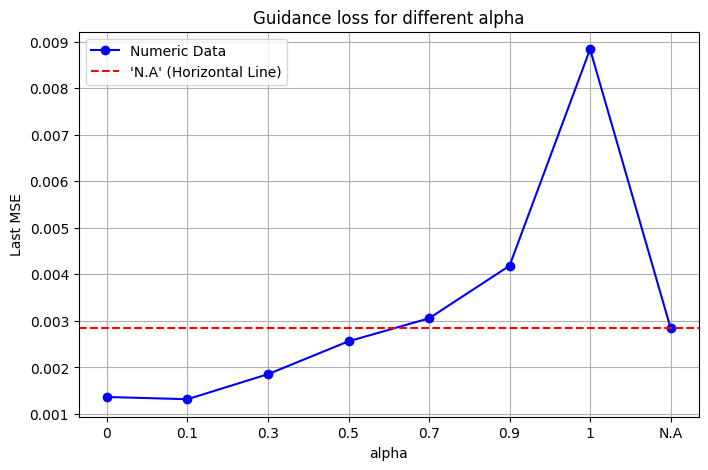

In [61]:
numeric_data = {k: v for k, v in last_loss.items() if isinstance(k, (int, float))}

# Extract x and y
x = list(last_loss.keys())
y = [float(v) for v in last_loss.values()]  # Convert tensors to floats

# Get the horizontal line value from 'N.A'
na_value = float(last_loss['N.A'])

# Plot the data points
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Numeric Data')

# Plot the horizontal line for 'N.A'
plt.axhline(na_value, color='r', linestyle='--', label="'N.A' (Horizontal Line)")

# Add labels, legend, and title
plt.xlabel('alpha')
plt.ylabel('Last MSE')
plt.title('Guidance loss for different alpha')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

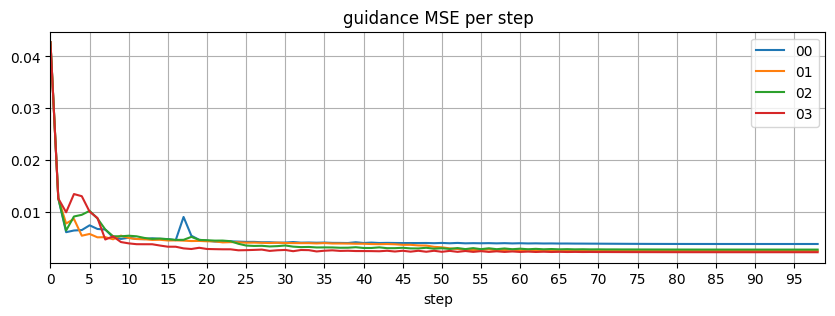

In [38]:
# make the graph narrower
plt.figure(figsize=(10, 3))
for idx, sample_id in enumerate(sample_ids):
    plt.plot(loss_history_array[idx])
    # add x ticks every 10
    plt.xticks(range(0, len(loss_history_array[idx]), 5))
    # start x with 0
    plt.xlim(0, len(loss_history_array[idx]))
    # add legend
    plt.legend(sample_ids)
# title
plt.title('guidance MSE per step')
plt.xlabel('step')
# add grids
plt.grid()

# loading condition

Input waveform shape: torch.Size([1, 1, 409600])


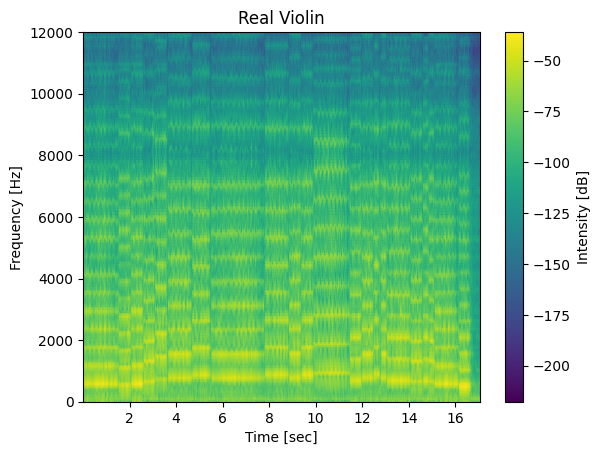

In [39]:
# loading another audio
audio_path = '/workspace/data/kinwai/diffusion-timbre-transfer/audios/216002_1_violin.wav'
waveform_raw, orig_sr = torchaudio.load(audio_path)
resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=sr)
waveform_raw = resampler(waveform_raw)
waveform_cond = waveform_raw.unsqueeze(0)
waveform_cond = waveform_cond

# Adjust the audio length to exactly 17 seconds with a sampling rate of 24,000 Hz, either by padding or cropping as needed.
pad_size = 409600 - waveform_cond.shape[-1] 
waveform_cond = torch.nn.functional.pad(waveform_cond, (0, pad_size))

print(f'Input waveform shape: {waveform_cond.shape}')
plot_spec(waveform_cond[0].numpy(), sr, title='Real Violin')
play_audio(waveform_cond[0].numpy(), sr)


In [40]:
chroma_c = f_chroma(waveform_cond)

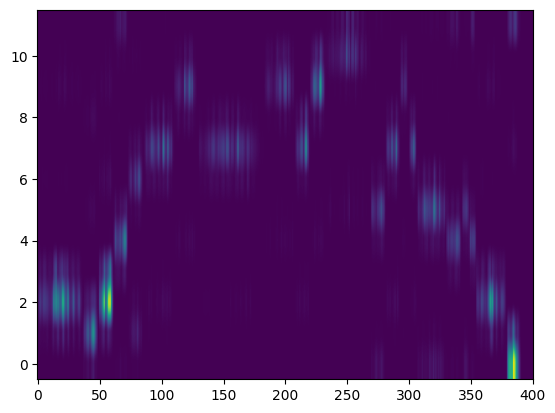

In [41]:
fig, ax = plt.subplots()
im = ax.imshow(chroma_c[0,0].detach().cpu().numpy(), origin='lower', aspect='auto')

# loading generated audio

In [42]:
for alpha in [1]:
    exp = f"alpha_exp/{alpha}"
    for sample_id in sample_ids:
        audio_49 = torch.load(f'frames/{exp}/{sample_id}_audio_pred_49.pt').cpu()
        audio_98 = torch.load(f'frames/{exp}/{sample_id}_audio_pred_98.pt').cpu()
        # save audio into mp3
        torchaudio.save(f'frames/{exp}/{sample_id}_audio_pred_49.mp3', audio_49.detach().squeeze(0), sr)
        torchaudio.save(f'frames/{exp}/{sample_id}_audio_pred_98.mp3', audio_98.detach().squeeze(0), sr)

# chroma_pred_49 = torch.load(f'frames/{exp}/{sample_id}_chroma_pred_49.pt').cpu()
# chroma_pred_98 = torch.load(f'frames/{exp}/{sample_id}_chroma_pred_98.pt').cpu()

In [26]:
for alpha in [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]:
    exp = f"alpha_exp/Noise/{alpha}"
    for sample_id in sample_ids:
        audio_49 = torch.load(f'frames/{exp}/{sample_id}_audio_pred_49.pt').cpu()
        audio_98 = torch.load(f'frames/{exp}/{sample_id}_audio_pred_98.pt').cpu()
        # save audio into mp3
        torchaudio.save(f'frames/{exp}/{sample_id}_audio_pred_49.mp3', audio_49.detach().squeeze(0), sr)
        torchaudio.save(f'frames/{exp}/{sample_id}_audio_pred_98.mp3', audio_98.detach().squeeze(0), sr)

# chroma_pred_49 = torch.load(f'frames/{exp}/{sample_id}_chroma_pred_49.pt').cpu()
# chroma_pred_98 = torch.load(f'frames/{exp}/{sample_id}_chroma_pred_98.pt').cpu()

In [9]:
play_audio(audio_49[0].detach().numpy(), sr)

In [10]:
play_audio(audio_98[0].detach().numpy(), sr)

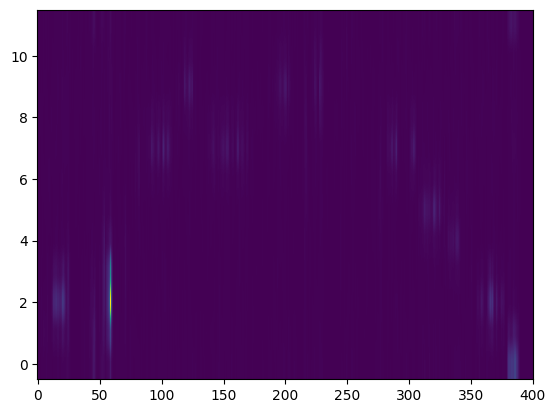

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(chroma_49[0,0].detach().cpu().numpy(), origin='lower', aspect='auto')

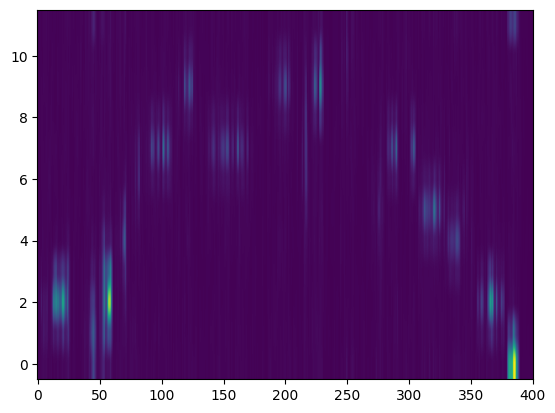

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(chroma_98[0,0].detach().cpu().numpy(), origin='lower', aspect='auto')

In [62]:
chroma_pred_98[0,0].shape

torch.Size([12, 401])

In [33]:
chroma_0.shape

torch.Size([1, 1, 12, 401])

In [42]:
torch.functional.F.mse_loss(chroma_c, chroma_0)

tensor(2508706.2500, grad_fn=<MseLossBackward0>)

In [40]:
torch.functional.F.mse_loss(chroma_c, chroma_98)

tensor(28625476., grad_fn=<MseLossBackward0>)

In [41]:
torch.functional.F.mse_loss(chroma_c, chroma_49)

tensor(14814085., grad_fn=<MseLossBackward0>)

In [45]:
print(torch.functional.F.mse_loss(chroma_c/chroma_c.max(), chroma_0/chroma_0.max()))
print(torch.functional.F.mse_loss(chroma_c/chroma_c.max(), chroma_49/chroma_49.max()))
print(torch.functional.F.mse_loss(chroma_c/chroma_c.max(), chroma_49/chroma_98.max()))

tensor(0.0427, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0020, grad_fn=<MseLossBackward0>)


In [37]:
chroma_0 / chroma_0.max()

tensor([[[[5.2439e-02, 6.6745e-02, 6.6348e-02,  ..., 2.6688e-04,
           2.2539e-04, 3.8869e-04],
          [6.8595e-02, 3.2901e-01, 4.5940e-01,  ..., 7.7768e-04,
           6.7472e-04, 6.6302e-04],
          [4.4211e-02, 7.4068e-02, 9.2649e-02,  ..., 5.1255e-04,
           3.9025e-04, 4.1332e-04],
          ...,
          [2.1605e-02, 2.8553e-02, 2.9856e-02,  ..., 3.5254e-04,
           2.7414e-04, 3.5370e-04],
          [1.8831e-02, 2.3236e-02, 2.1598e-02,  ..., 1.4152e-04,
           1.2027e-04, 1.3007e-04],
          [2.8739e-02, 1.6306e-02, 9.1191e-03,  ..., 9.1639e-05,
           9.3976e-05, 2.0839e-04]]]], grad_fn=<DivBackward0>)

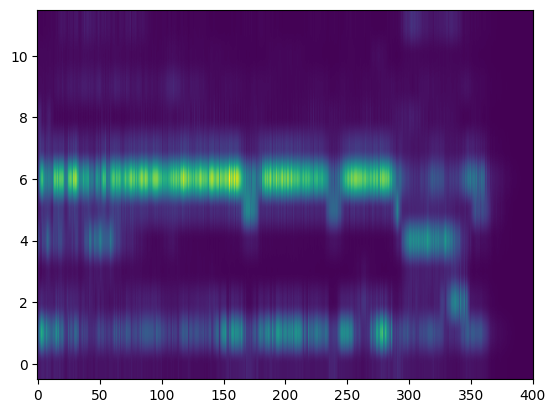

In [38]:

fig, ax = plt.subplots()
im = ax.imshow((chroma_0[0,0] / chroma_0.max()).detach().cpu().numpy(), origin='lower', aspect='auto')

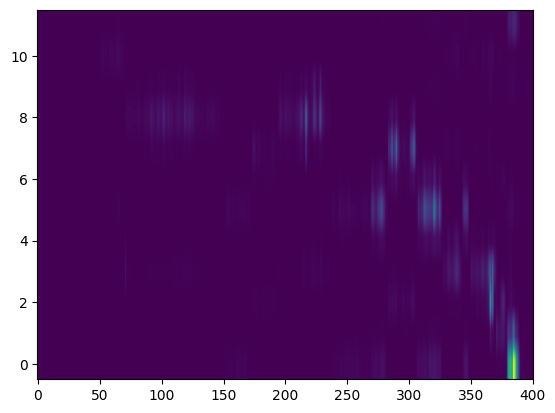

In [20]:

fig, ax = plt.subplots()
im = ax.imshow((chroma_98[0,0] / chroma_98.max()).detach().cpu().numpy(), origin='lower', aspect='auto')